# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Chaos at Terminal 5 with B...
1,Not Verified | BA cancelled our flight and co...
2,✅ Trip Verified | When on our way to Heathrow ...
3,"✅ Trip Verified | Nice flight, good crew, very..."
4,✅ Trip Verified | 8 months have passed and st...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,✅ Trip Verified | Chaos at Terminal 5 with B...
1,Not Verified | BA cancelled our flight and co...
2,✅ Trip Verified | When on our way to Heathrow ...
3,"✅ Trip Verified | Nice flight, good crew, very..."
4,✅ Trip Verified | 8 months have passed and st...
...,...
995,✅ Trip Verified | Madrid to London. Good impro...
996,✅ Trip Verified | London to Munich. The groun...
997,✅ Trip Verified | London to Cape Town. Waiti...
998,✅ Trip Verified | Full flight from MUC to LHR ...


In [6]:
df1=df

#Removing Trip verified / Not verified for preparing data for sentemental analysis

In [7]:
df.reviews= df.reviews.str.split('|',expand=True)[1]


In [8]:
df

,reviews
0,Chaos at Terminal 5 with BA cancellations a...
1,BA cancelled our flight and could not book u...
2,When on our way to Heathrow Airport and merel...
3,"Nice flight, good crew, very good seat, food ..."
4,8 months have passed and still wasting my ti...
...,...
995,Madrid to London. Good improvement. This BA c...
996,London to Munich. The ground staff were very...
997,"London to Cape Town. Waiting at gate, the s..."
998,Full flight from MUC to LHR with British Airw...


Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

#Step 1: Cleaning the text

In [9]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...
1,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...
2,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...
3,"Nice flight, good crew, very good seat, food ...",Nice flight good crew very good seat food was...
4,8 months have passed and still wasting my ti...,months have passed and still wasting my time ...


#Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

#Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

#Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

#Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


NLTK is a leading platform for building Python programs to work with human language data. 
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [10]:
import nltk
"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bharath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bharath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bharath\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Bharath\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Bharath\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[(Chaos, n), (Terminal, n), (BA, n), (cancella..."
1,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[(BA, n), (cancelled, v), (flight, n), (could,..."
2,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...,"[(way, n), (Heathrow, n), (Airport, n), (merel..."
3,"Nice flight, good crew, very good seat, food ...",Nice flight good crew very good seat food was...,"[(Nice, a), (flight, n), (good, a), (crew, n),..."
4,8 months have passed and still wasting my ti...,months have passed and still wasting my time ...,"[(months, n), (passed, v), (still, r), (wastin..."


In [12]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[(Chaos, n), (Terminal, n), (BA, n), (cancella...",Chaos Terminal BA cancellation delay staff g...
1,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[(BA, n), (cancelled, v), (flight, n), (could,...",BA cancel flight could book us onto flight n...
2,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...,"[(way, n), (Heathrow, n), (Airport, n), (merel...",way Heathrow Airport merely half hour schedu...
3,"Nice flight, good crew, very good seat, food ...",Nice flight good crew very good seat food was...,"[(Nice, a), (flight, n), (good, a), (crew, n),...",Nice flight good crew good seat food would e...
4,8 months have passed and still wasting my ti...,months have passed and still wasting my time ...,"[(months, n), (passed, v), (still, r), (wastin...",month pass still waste time BA team share do...


In [13]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Chaos at Terminal 5 with BA cancellations a...,Chaos Terminal BA cancellation delay staff g...
1,BA cancelled our flight and could not book u...,BA cancel flight could book us onto flight n...
2,When on our way to Heathrow Airport and merel...,way Heathrow Airport merely half hour schedu...
3,"Nice flight, good crew, very good seat, food ...",Nice flight good crew good seat food would e...
4,8 months have passed and still wasting my ti...,month pass still waste time BA team share do...
...,...,...
995,Madrid to London. Good improvement. This BA c...,Madrid London Good improvement BA club Europ...
996,London to Munich. The ground staff were very...,London Munich ground staff friendly plane cl...
997,"London to Cape Town. Waiting at gate, the s...",London Cape Town Waiting gate staff announce...
998,Full flight from MUC to LHR with British Airw...,Full flight MUC LHR British Airways plus sid...


Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [14]:
#!pip install vaderSentiment

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[(Chaos, n), (Terminal, n), (BA, n), (cancella...",Chaos Terminal BA cancellation delay staff g...,-0.9186,Negative
1,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[(BA, n), (cancelled, v), (flight, n), (could,...",BA cancel flight could book us onto flight n...,-0.7178,Negative
2,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...,"[(way, n), (Heathrow, n), (Airport, n), (merel...",way Heathrow Airport merely half hour schedu...,-0.8885,Negative
3,"Nice flight, good crew, very good seat, food ...",Nice flight good crew very good seat food was...,"[(Nice, a), (flight, n), (good, a), (crew, n),...",Nice flight good crew good seat food would e...,0.9741,Positive
4,8 months have passed and still wasting my ti...,months have passed and still wasting my time ...,"[(months, n), (passed, v), (still, r), (wastin...",month pass still waste time BA team share do...,-0.8126,Negative


In [16]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    495
Negative    400
Neutral     105
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x1d9a6021410>,
 [Text(0.01727803256672648, 1.0998642959886566, 'Positive'),
  Text(-0.3726116618814168, -1.0349688639905883, 'Negative'),
  Text(1.2772152593917465, -0.43728844162277347, 'Neutral')],
 [Text(0.009424381400032626, 0.5999259796301762, '49.5%'),
  Text(-0.20324272466259097, -0.5645284712675935, '40.0%'),
  Text(0.8041725707281367, -0.27532975954026473, '10.5%')])

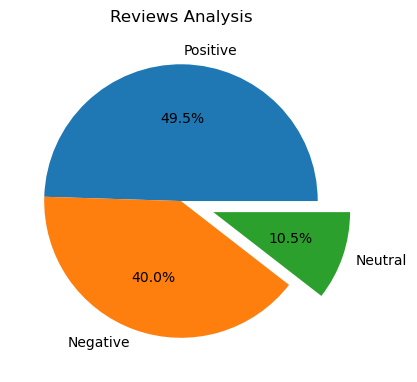

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

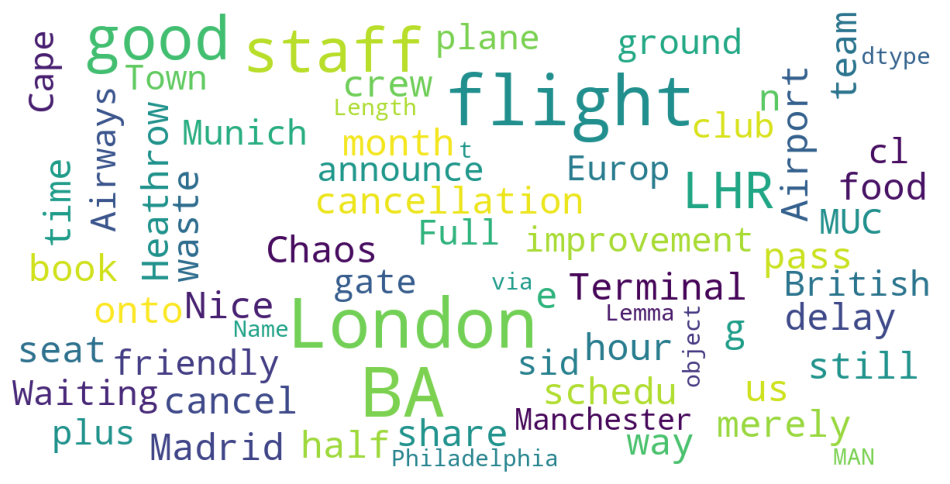

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

In [19]:
df

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[(Chaos, n), (Terminal, n), (BA, n), (cancella...",Chaos Terminal BA cancellation delay staff g...,-0.9186,Negative
1,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[(BA, n), (cancelled, v), (flight, n), (could,...",BA cancel flight could book us onto flight n...,-0.7178,Negative
2,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...,"[(way, n), (Heathrow, n), (Airport, n), (merel...",way Heathrow Airport merely half hour schedu...,-0.8885,Negative
3,"Nice flight, good crew, very good seat, food ...",Nice flight good crew very good seat food was...,"[(Nice, a), (flight, n), (good, a), (crew, n),...",Nice flight good crew good seat food would e...,0.9741,Positive
4,8 months have passed and still wasting my ti...,months have passed and still wasting my time ...,"[(months, n), (passed, v), (still, r), (wastin...",month pass still waste time BA team share do...,-0.8126,Negative
...,...,...,...,...,...,...
995,Madrid to London. Good improvement. This BA c...,Madrid to London Good improvement This BA clu...,"[(Madrid, n), (London, n), (Good, n), (improve...",Madrid London Good improvement BA club Europ...,0.7717,Positive
996,London to Munich. The ground staff were very...,London to Munich The ground staff were very f...,"[(London, n), (Munich, v), (ground, n), (staff...",London Munich ground staff friendly plane cl...,0.5994,Positive
997,"London to Cape Town. Waiting at gate, the s...",London to Cape Town Waiting at gate the staff...,"[(London, n), (Cape, n), (Town, n), (Waiting, ...",London Cape Town Waiting gate staff announce...,-0.4019,Negative
998,Full flight from MUC to LHR with British Airw...,Full flight from MUC to LHR with British Airw...,"[(Full, n), (flight, n), (MUC, n), (LHR, v), (...",Full flight MUC LHR British Airways plus sid...,-0.0772,Negative


In [11]:
df.to_csv("BA_reviews_analysed.csv")